In [1]:
!pip install networkx
!pip install tqdm
!pip install numpy
!pip install matplotlib

In [2]:
import networkx as nx
import numpy as np

In [3]:
# Establece las paths a las carpeta de grafo para cargar y de plot para guardar el gráfico generado
def get_paths(MODE, MANIFESTACION, metric="correlation"):
    graphs_folder = "graphs/"
    plots_folder = "plots/" + metric + '/'

    modes_folder = "nodes_" + MODE + '/'
    graphs_folder = graphs_folder + modes_folder + MANIFESTACION + '/'
    plots_folder = plots_folder + modes_folder + MANIFESTACION + '/'
    return  graphs_folder, plots_folder

# Proceso de creación de subgrafos

In [4]:
from utils_graph_generation import load_graph
from utils_graph_metrics import calc_clust
from utils_graph_plot import plot_clust_by_tres_fig2e, plot_avg_clust_by_norm_int_deg_fig2a

In [5]:
# Carga un grafo dado un nombre y una ruta de archivos , devuelve los parametros necesarios
# para hacer las gráficas 2e y 2a
def calc_plots(name_graph, MAX_UMBRAL, graphs_folder):
    G = load_graph(name_graph, graphs_folder)
    return calc_clust(G, MAX_UMBRAL)

In [6]:

# Seleccionamos el modo con el que queremos crear nuestra red: Hashtags como nodos o usuarios como nodos
#MODE = "user"
MODE = "hashtag"

# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 600

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar

MANIFESTACION = "nat"
# Hora critica NaT
hora = "429624"

MANIFESTACION = "9n"
# Hora critica 9n
hora = "437038"

graphs_folder, plots_folder = get_paths(MODE, MANIFESTACION, metric="correlation")
dict_tres_avg_clust_fig2e, arr_norm_int_deg_fig2a = calc_plots(hora, MAX_UMBRAL, graphs_folder)

Cargado el grafo de la hora 437037, numero de nodos: 870, numero de aristas: 9709


 63%|██████▎   | 379/600 [00:07<00:04, 53.40it/s] 


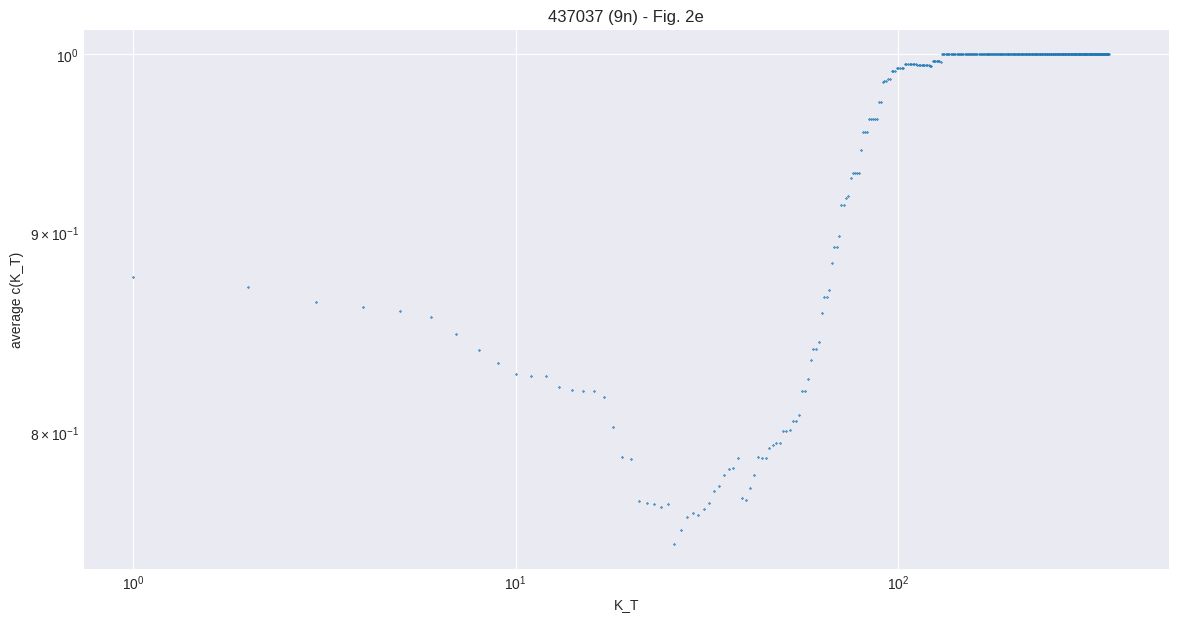

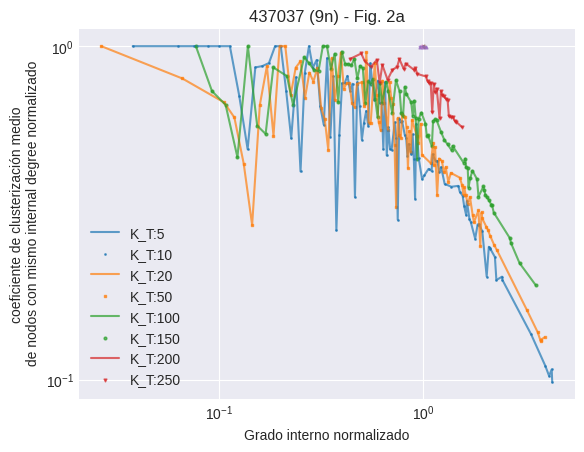

In [7]:
# Fig 2e
plot_clust_by_tres_fig2e(dict_tres_avg_clust_fig2e, MANIFESTACION , hora, plots_folder)

# Fig 2a
plot_avg_clust_by_norm_int_deg_fig2a(arr_norm_int_deg_fig2a, MANIFESTACION, hora, plots_folder)

# Distribución de grados
Dado un grafo muestra tres gráficas:
* Un histograma con la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con el acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con la inversa del acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo

In [8]:
from utils_graph_plot import plot_histogram, plot_scatter, plot_bar_degree_distribution, plot_bar_degree_cummulative_distribution, plot_bar_degree_complementary_cummulative_distribution

ImportError: cannot import name 'plot_bar_degree_distribution' from 'utils_graph_plot' (/home/rcmrk/Escritorio/TFM/Social_Manifestations_Fractal/utils_graph_plot.py)

In [ ]:
# Dado un nombre de grafo, imprime las gráficas relativas a las distribuciones de grados de los nodos
def calc_plot_degree_distribution(name_graph, graphs_folder, plots_folder):
    G = load_graph(name_graph, graphs_folder)

    # Normalizamos entre el número total de nodos
    points = np.sort(np.array(list(dict(G.degree()).values())).astype(float)/float(G.number_of_nodes()))

    plot_bar_degree_distribution(points, name_graph, plots_folder)

    plot_bar_degree_cummulative_distribution(points, name_graph, plots_folder)

    plot_bar_degree_complementary_cummulative_distribution(points, name_graph, plots_folder)


Cargado el grafo de la hora 437038, numero de nodos: 5759, numero de aristas: 74354


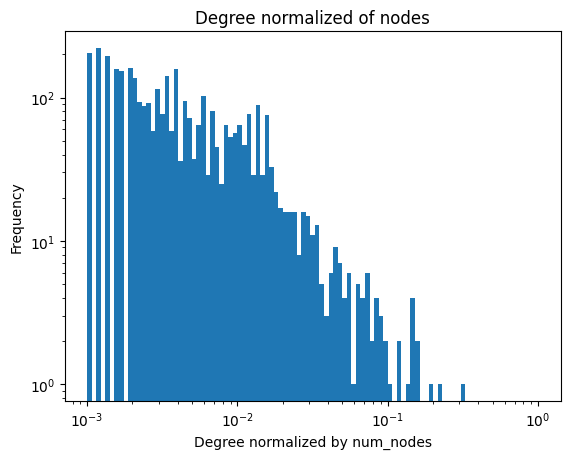

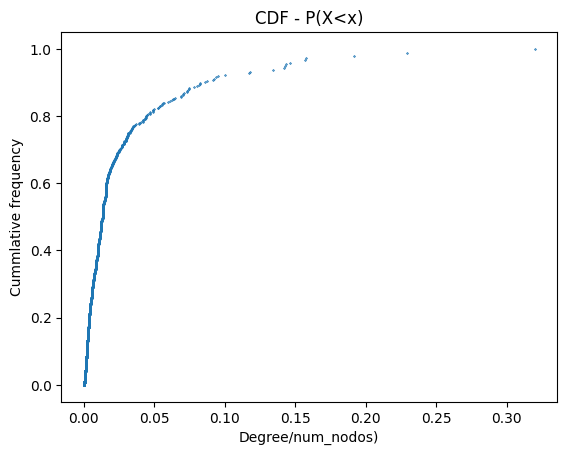

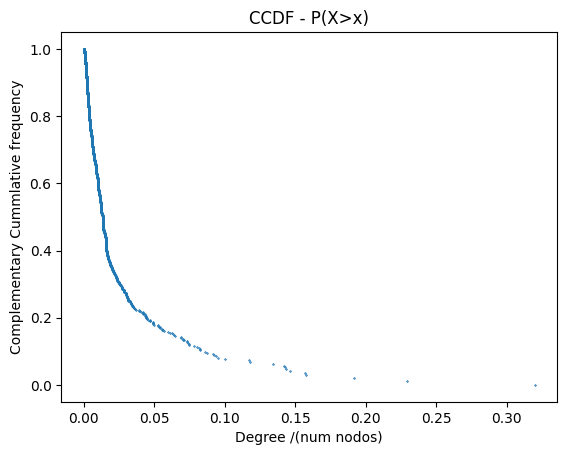

In [ ]:
MODE = "hashtag"

MANIFESTACION = "nat"
hora = "429624"

MANIFESTACION = "9n"
hora = "437038"


graphs_folder, plots_folder = get_paths(MODE, MANIFESTACION, metric="degree")

calc_plot_degree_distribution(hora, graphs_folder, plots_folder)


In [ ]:
#H = tresh_normalization(G, 1)
#A graph is commonly classified as small-world if sigma>1.
sigma = nx.smallworld.sigma(G)
print("a")
# Values close to 0 mean that G has small-world characteristics.
omega = nx.smallworld.omega(G)

print("sigma: ", sigma, ", omega: ", omega)